# Fine map signal on chr7 for BMI and Asthma

We have performed GWAS on UKBB for BMI and Asthma. We found a region on chr7 where there is a signal overlap between these traits. We use fine-mapping to see if there are anything of interest

## Analysis workflow

In [ ]:
[global]
parameter: sumstatFile = path()
parameter: ldFile = path()
parameter: cwd = path('output')

In [3]:
[default_1]
parameter: N = 339353
input: sumstatFile, ldFile
output: f"{cwd:a}/{_input[0]:bnn}.SuSiE_RSS.rds"
R: expand = "${ }"
    sumstat = read.csv(${_input[0]:r}, sep = '\t', header=T,stringsAsFactors=F)
    ld = read.csv(${_input[1]:r}, sep = '\t', header=T, stringsAsFactors=F)
    ld = as.matrix(ld[,-1])
    res = susieR::susie_rss(as.double(sumstat$Z), ld, z_ld_weight = 1/${N}, 
                            L = 10,
                            estimate_residual_variance = TRUE, check_R=F,
                            estimate_prior_variance = TRUE, check_z = F)
    res$pos = as.integer(sumstat$POS)
    res$z = as.double(sumstat$Z)
    res$p = as.double(sumstat$P)
    res$var_names = sumstat$SNP
    saveRDS(res, ${_output:r})

[default_2]
parameter: start = 28139386
parameter: end = 28259874
output: f"{_input:n}.png"
R: expand = "${ }"
    res = readRDS(${_input:r})
    png(${_output:r}, width = 8, height=5, unit='in', res=300)
    susieR::susie_plot(res, y="PIP",pos=list(attr='pos', start=${start},end=${end}))
    dev.off()

In [5]:
%cd ~/tmp/07-Jul-2020

/home/gw/tmp/07-Jul-2020

For asthma,

In [38]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz

INFO: Running default_1: 
Warning message:
In set_R_attributes(R, r_tol) : Negative eigenvalues are set to 0
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
INFO: default_2 (index=0) is ignored due to saved signature
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=f98c56b76d448735) is executed successfully with 1 completed step and 1 ignored step.


For BMI,

In [39]:
sos run SuSiE_RSS.ipynb \
    --sumstatFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.sumstats.gz \
    --ldFile 7_28139386_28259874/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.population_ld.gz

INFO: Running default_1: 
Warning message:
In set_R_attributes(R, r_tol) : Negative eigenvalues are set to 0
INFO: default_1 is completed.
INFO: default_1 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds
INFO: Running default_2: 
INFO: default_2 (index=0) is ignored due to saved signature
INFO: default_2 output:   /home/gw/tmp/07-Jul-2020/output/ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png
INFO: Workflow default (ID=f89bc0349605f139) is executed successfully with 1 completed step and 1 ignored step.


## Fine-map results

In [1]:
%cd ~/tmp/07-Jul-2020/output

/home/gw/tmp/07-Jul-2020/output

Asthma:

> ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (59.4 KiB):

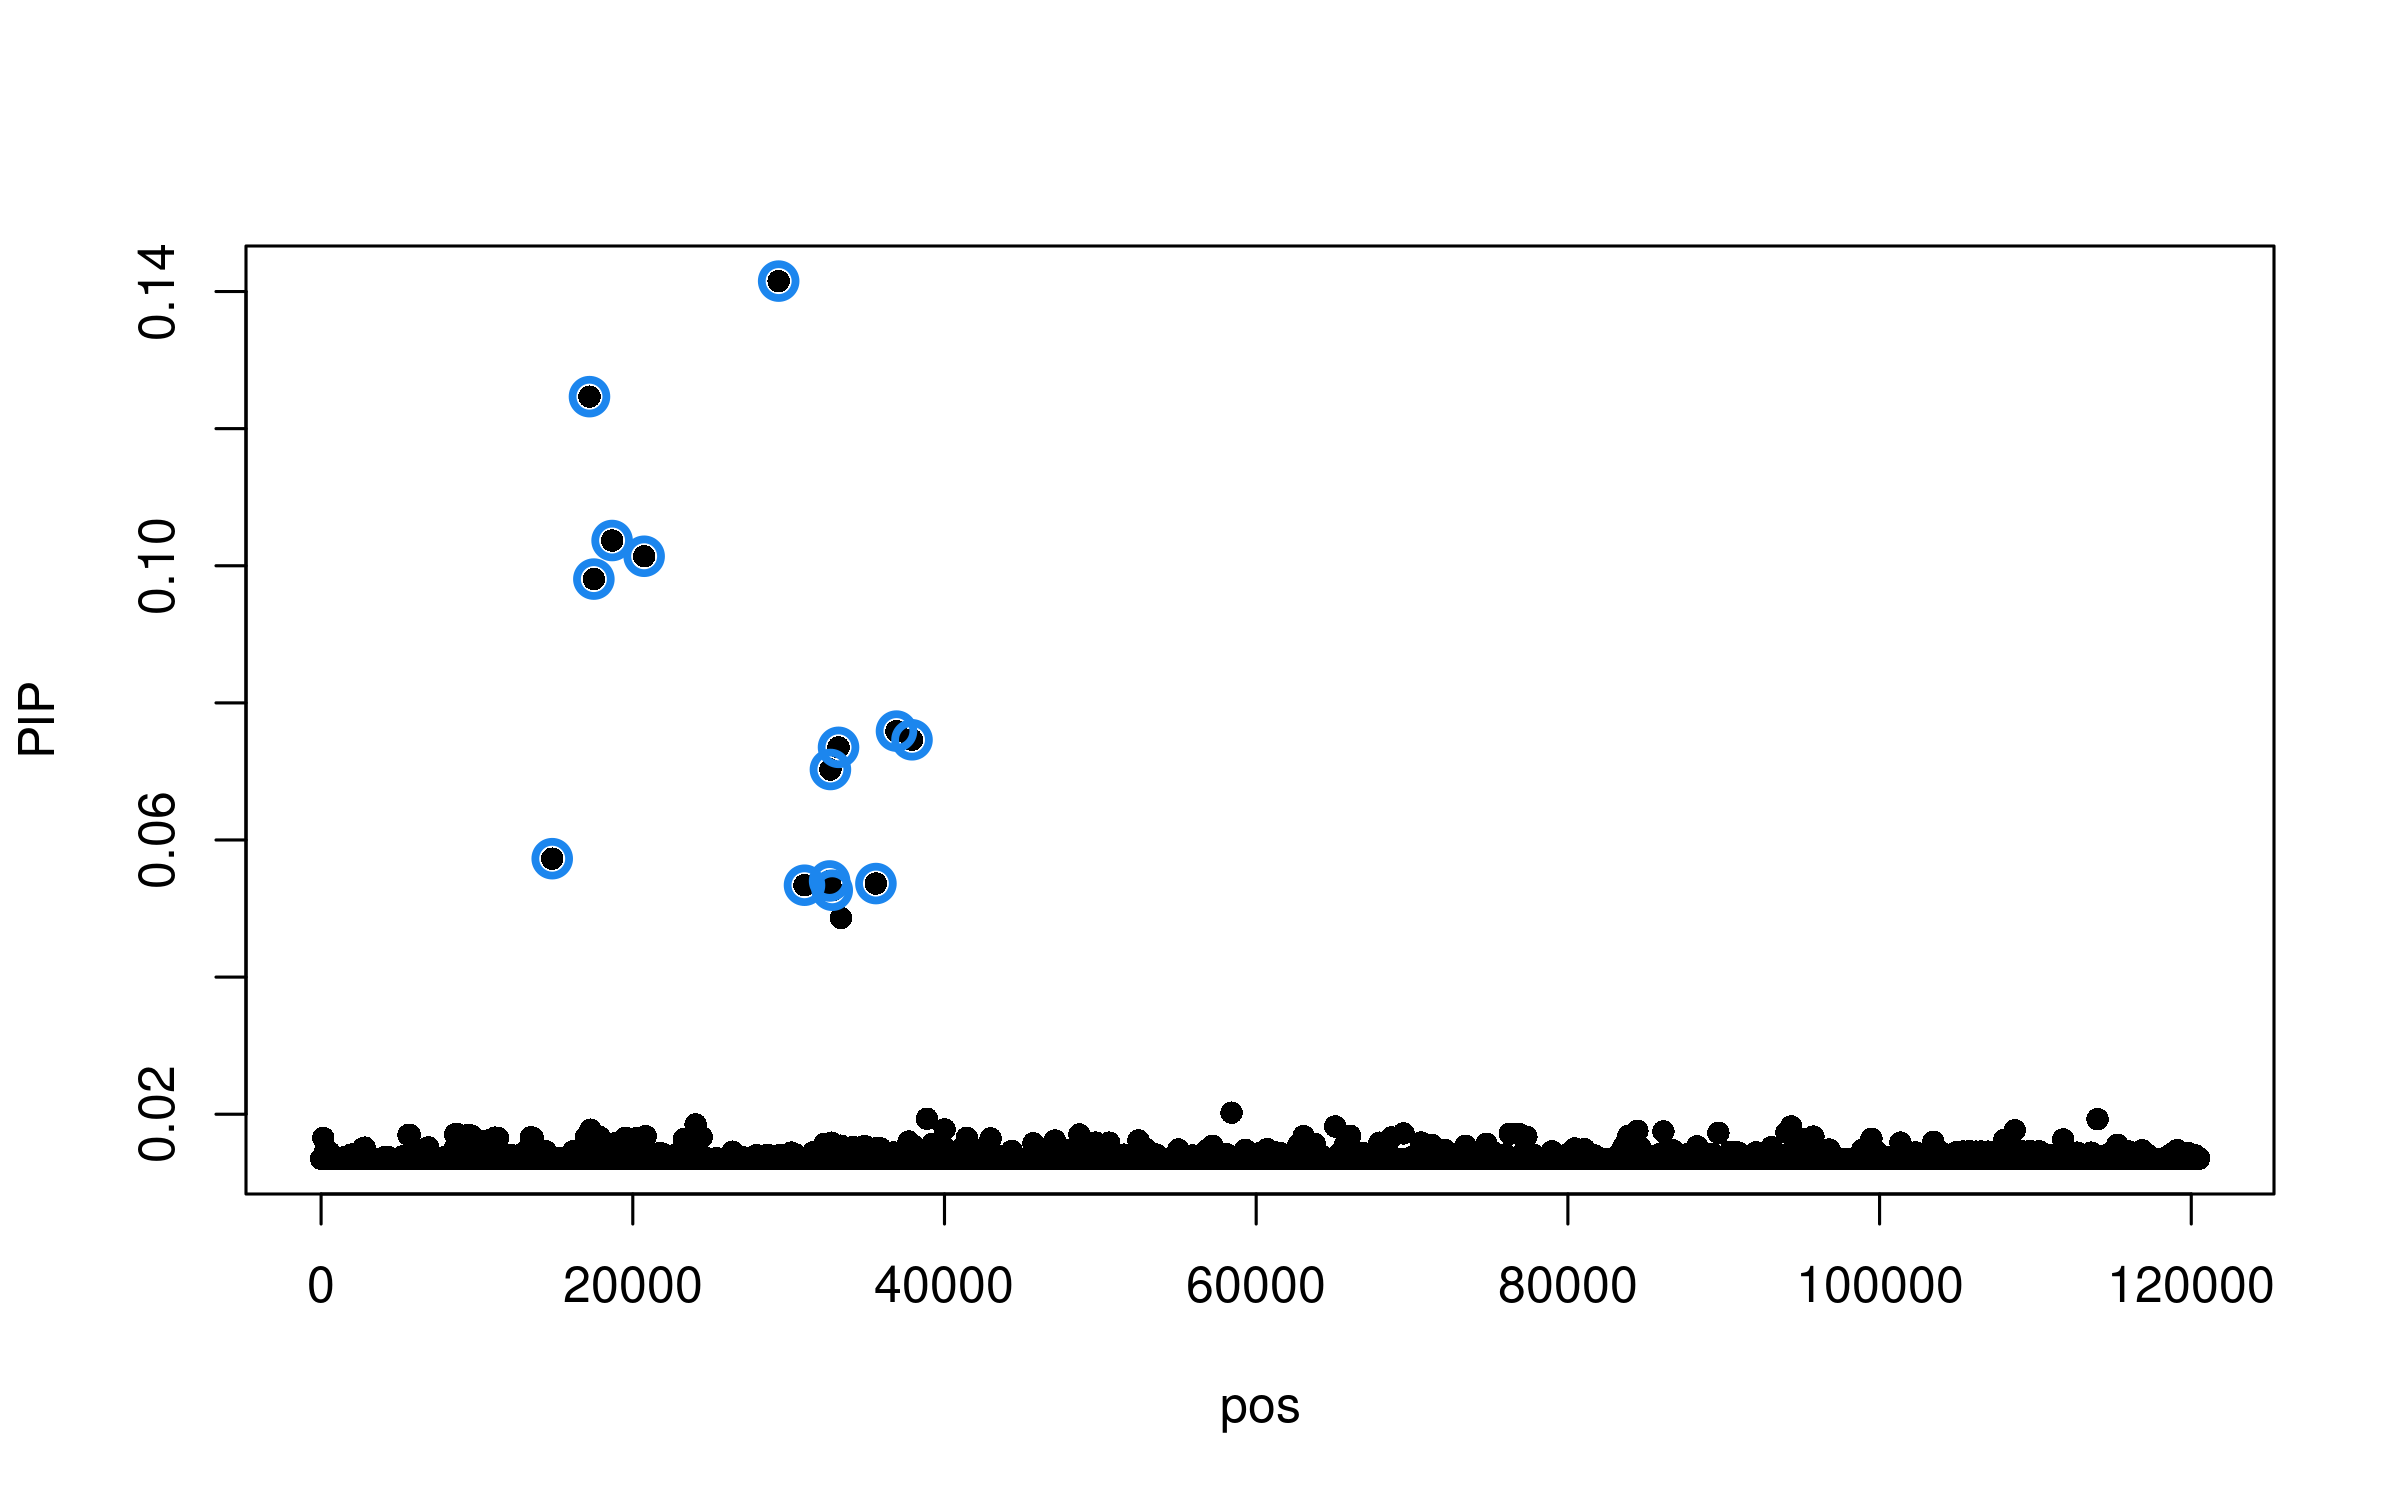

In [2]:
%preview ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

BMI:

> ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png (71.5 KiB):

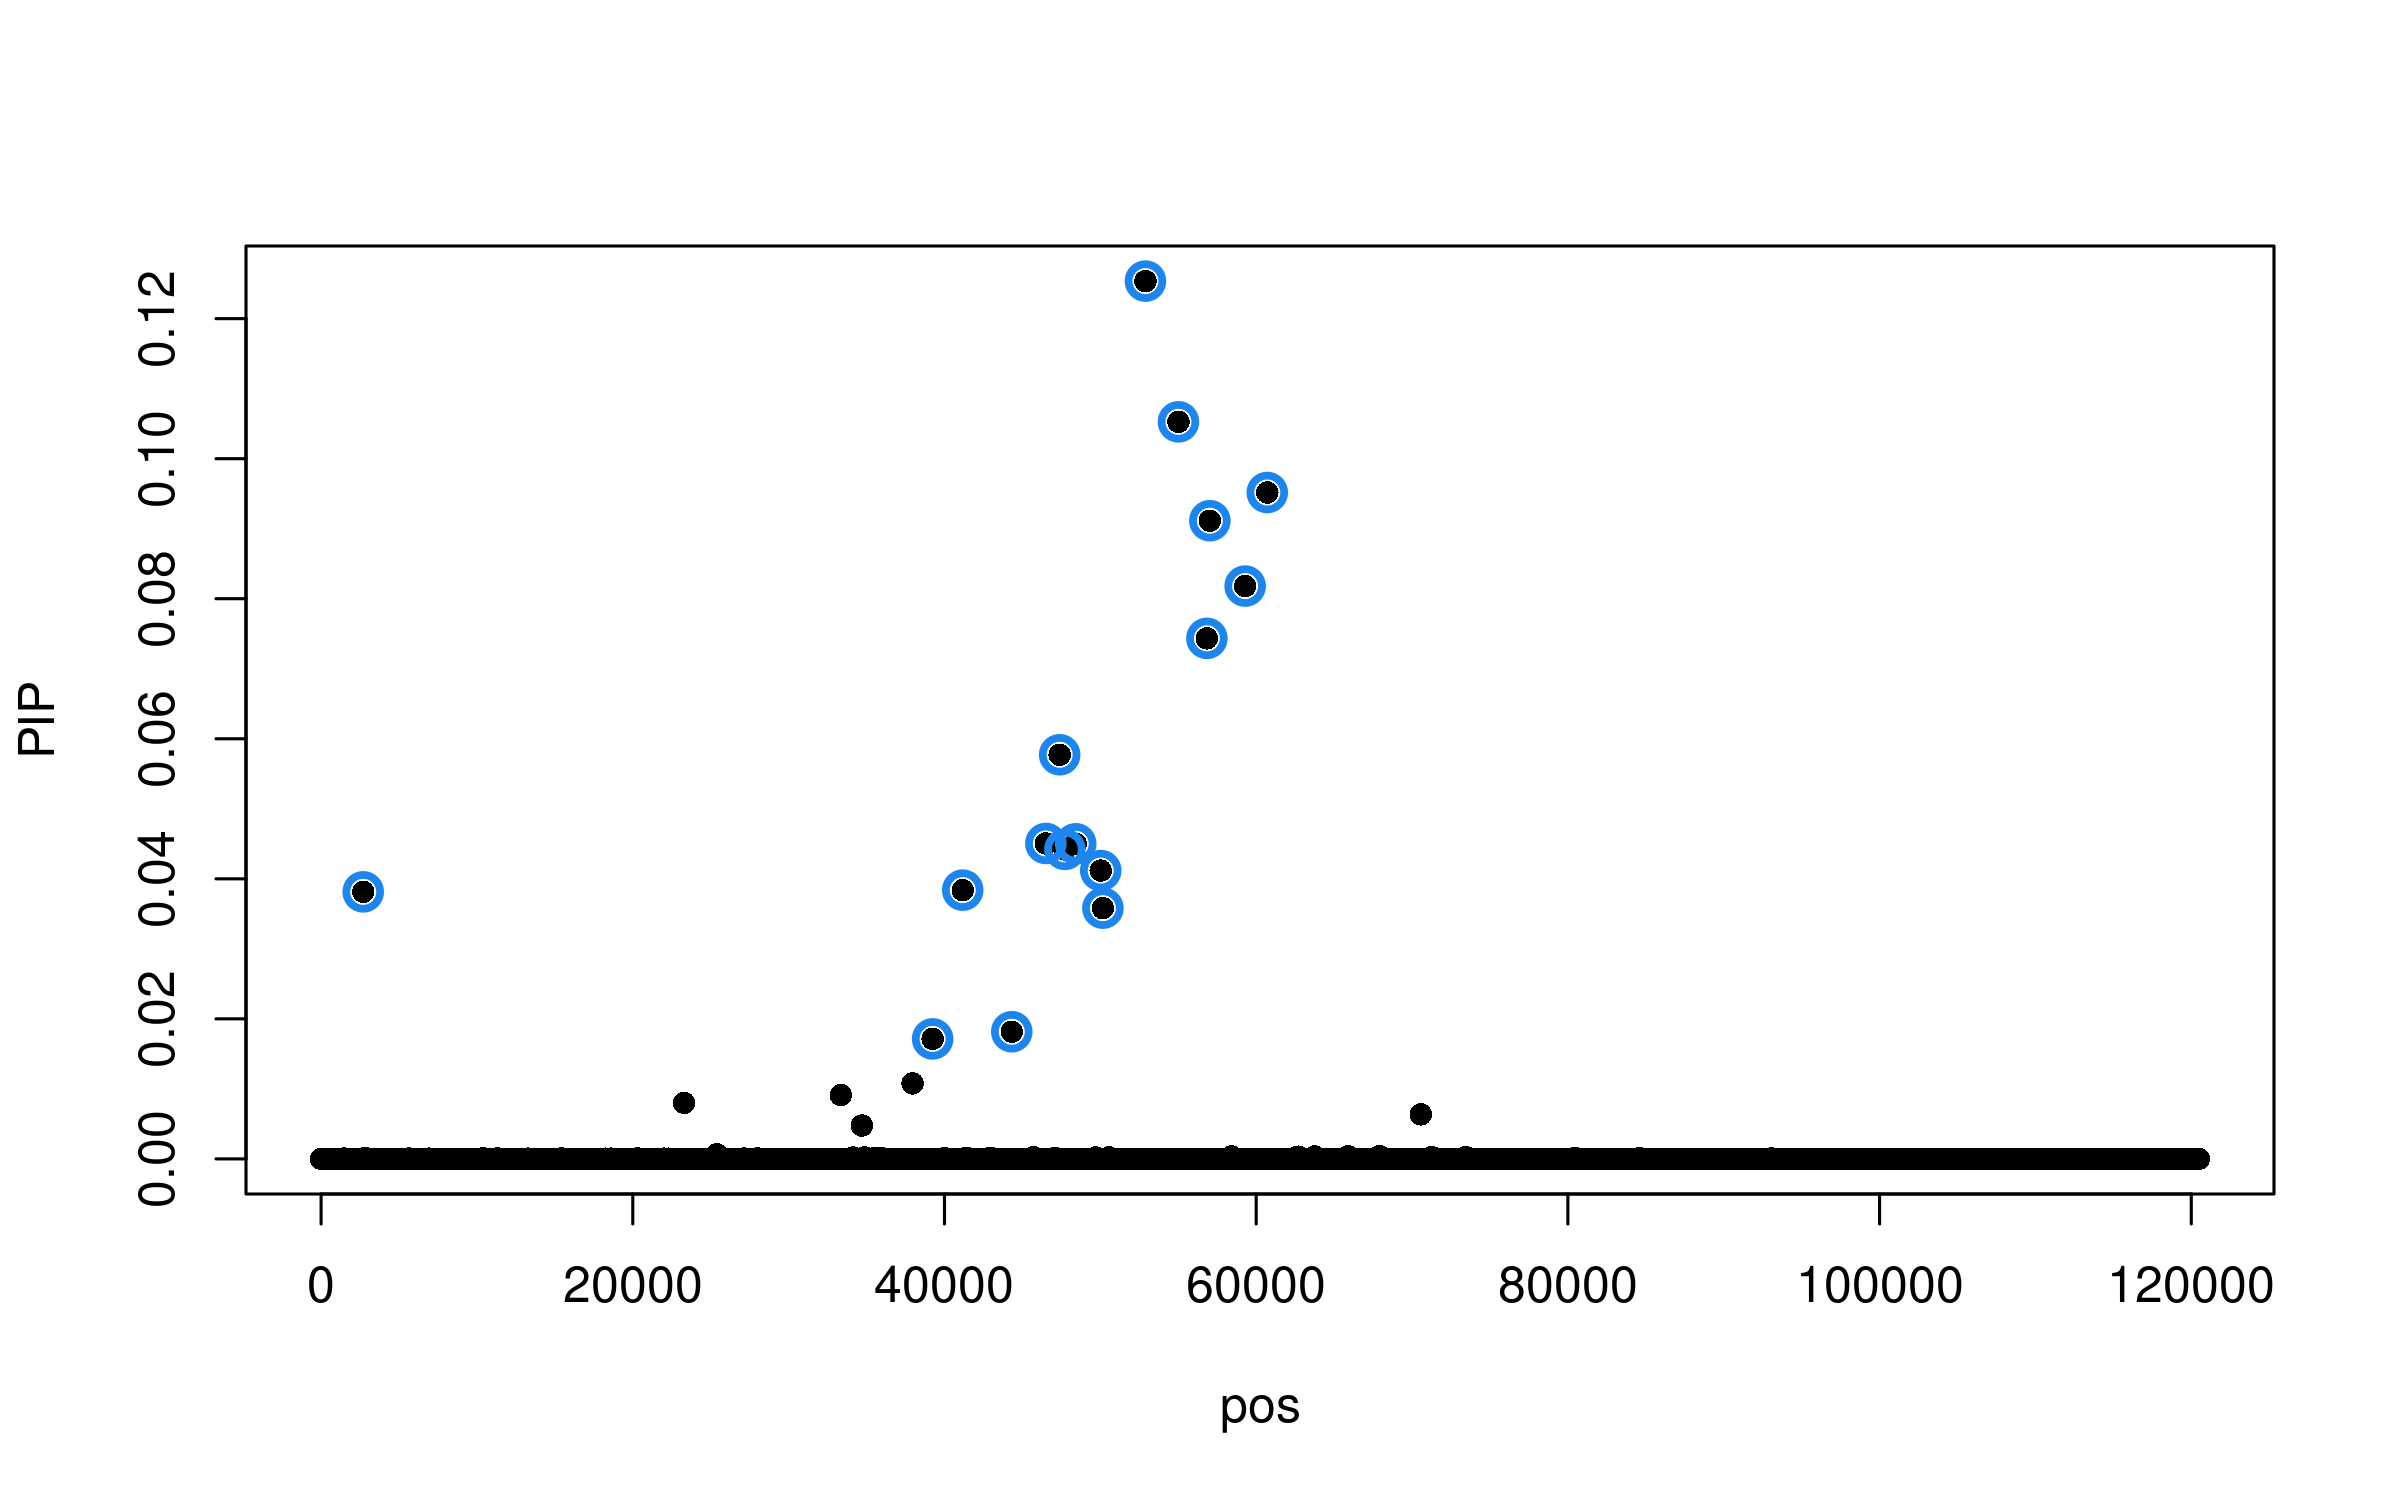

In [3]:
%preview ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.png

## Result

### Pleiotropy

First, let's look into the signals detected,

In [14]:
asthma = readRDS('ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')
bmi = readRDS('ukb_imp_v3.UKB_caucasians_BMIwaisthip_AsthmaAndT2D_INT-BMI_withagesex_041720.BoltLMM.snp_stats.all_chr_7_28139386_28259874.SuSiE_RSS.rds')

Variables in CS:

In [15]:
bmi$sets$cs

$L1
 [1]  24 287 301 318 328 332 335 346 355 356 368 376 385 388 393 406

In [16]:
bmi_vars = bmi$var_names[unlist(bmi$sets$cs)]

In [17]:
asthma_vars = asthma$var_names[unlist(asthma$sets$cs)]

In [18]:
bmi_vars

[1] "rs10274928"      "7:28178625_TG_T" "rs864745"        "rs849140"       
 [5] "rs849142"        "rs11455969"      "rs10622246"      "rs1635851"      
 [9] "rs1635852"       "rs1635853"       "rs849133"        "rs860262"       
[13] "rs849134"        "rs849135"        "rs1708302"       "rs1513272"

In [19]:
asthma_vars

[1] "7:28154215_GT_G"    "rs4722758"          "rs6977955"         
 [4] "rs4719922"          "rs9648346"          "7:28168745_GTCTT_G"
 [7] "rs2893312"          "rs2189965"          "rs2189966"         
[10] "rs4722760"          "rs917115"           "rs67250450"        
[13] "rs917117"           "rs11495981"

In [20]:
intersect(bmi_vars, asthma_vars)

character(0)

There is no intersect between BMI and Asthma variables -- it does not seem to have a pleiotropy effect looking at the fine mapping result. **Also recall that BMI analysis controlled for Asthma as a covariate.**

### An issue with Asthma result

In [21]:
res = data.frame(cbind(asthma$var_names, asthma$pos - 28139386, asthma$pip, asthma$p, asthma$z), stringsAsFactors=F)
colnames(res) = c('rsID', 'pos', 'PIP', 'p-value', 'z-score')

### Rank top SNPs by PIP

In [28]:
tops_pip = head(res[order(abs(as.double(res[,3])), decreasing = T),], 30)
tops_pip

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
177,7:28168745_GTCTT_G,29359,0.141519911231575,6.71191e-14,-7.4933860634063
106,rs4722758,17220,0.12466620962543,1.07378e-13,-7.43149384462692
115,rs4719922,18672,0.103681418249994,1.41832e-13,-7.39460241855153
133,rs9648346,20727,0.101386349958659,1.49718e-13,-7.38740858083148
109,rs6977955,17501,0.0980561454235176,1.61025e-13,-7.37771847780265
212,rs917117,36919,0.0758828780778825,1.94069e-13,-7.35281945240773
219,rs11495981,37915,0.0746147741132384,1.92604e-13,-7.35383185092227
193,rs917115,33200,0.0735160952543413,1.36404e-13,-7.39978613584123
190,rs2189966,32680,0.0702808881591425,1.40192e-13,-7.39614776404627


Here, we can see many SNPs with small p-values also have large PIP.

### Rank SNPs by p-value, for those not in any CS

In [29]:
tops = head(res[order(abs(as.double(res[,4])), decreasing = F),], 30)

In [30]:
tops[!(tops$rsID %in% asthma_vars),]

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
195,rs917116,33353,0.048626277225544,2.32354e-13,-7.32872419843129
226,rs4722762,38876,0.0193361081711649,2.11981e-12,-7.02636663632589
608,rs113364328,116144,0.0135678977019605,1.03514e-10,-6.46172805979182
167,rs740122,27056,0.0137286181317798,1.68047e-10,-6.388020332317
518,rs10264306,100080,0.0135458334440757,2.00058e-10,-6.36129637272432
140,rs10951192,21647,0.0137376210037418,2.15719e-10,-6.34971156970645
438,rs849335,84604,0.0152038329893386,3.02806e-10,6.29733520704548
20,rs10245867,2800,0.0151265957237481,3.98812e-10,-6.2544919625055
488,rs849327,93071,0.0151978508407206,4.74629e-10,6.2272712449011


`rs849335`, a SNP previously detected, is not in any CS, but it has p-value `3.02806e-10`. This is a somewhat puzzling behavior.

My first thought is that if `rs849335` has too many other SNPs in high LD with it, then perhaps the PIP will be "diffused" over all of them. Say, if there are 10 other SNPs in complete LD with it (although apparently it cannot be the case just by looking at the p-values), then even if it is a true non-zero effect variable, the actual PIP it gets cannot be higher than 0.1. 

Let's see how many variables are in high LD with it:

In [31]:
ld = '../7_28139386_28259874/ukb_imp_v3.Asthma_casesbyICD10codesANDselfreport_controlsbyselfreportandicd10_noautoimmuneincontrols.fastGWA.snp_stats.all_chr_7_28139386_28259874.sample_ld.gz'
ld = read.csv(ld, sep = '\t', header=T, stringsAsFactors=F)

In [36]:
ld_i = ld[438,][-1]

In [37]:
ld_i

,X7_28139386_C_T,X7_28139509_C_T,X7_28139523_C_G,X7_28139640_A_G,X7_28139948_A_G,X7_28140381_A_AT,X7_28140706_C_T,X7_28140852_C_T,X7_28140896_G_T,X7_28140931_C_T,⋯,X7_28258257_A_AAG,X7_28258261_G_GA,X7_28258382_G_T,X7_28258482_G_GAA,X7_28259131_A_G,X7_28259233_C_T,X7_28259411_C_T,X7_28259461_C_T,X7_28259623_A_G,X7_28259874_A_T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
438,-0.431566,-0.06310526,0.02014465,0.07547367,0.02656008,-0.3888957,-0.06201943,0.009617691,0.03141749,0.03059511,⋯,-0.3975496,-0.3974588,-0.1036372,-0.3650153,-0.3954702,-0.6452592,-0.06824201,-0.04283515,0.0158493,0.38096


In [41]:
high_ld = which(ld_i>0.8)

In [42]:
high_ld

[1] 417 438 439 488 567 610

In [43]:
res[high_ld,]

,rsID,pos,PIP,p-value,z-score
,<chr>,<chr>,<chr>,<chr>,<chr>
417,rs849333,80426,0.0149938854857306,4.82443e-10,6.22471147744444
438,rs849335,84604,0.0152038329893386,3.02806e-10,6.29733520704548
439,rs849336,84667,0.0150946661466066,4.9318e-10,6.22125939937902
488,rs849327,93071,0.0151978508407206,4.74629e-10,6.2272712449011
567,rs11448038,108125,0.0142494868091014,7.76813e-07,4.94110439349796
610,rs498475,116854,0.014741506160461,3.96267e-09,5.88574411917802


It is not many of them at all, but all their PIPs are very small.